<a href="https://colab.research.google.com/github/azaynul10/sign-language-detection-yolov11/blob/main/Sign_Language_Detection_using_Yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Nov  4 17:31:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 23.3 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step # 03 Download Dataset**

In [ ]:
import gdown
# download the data from g drive

url = "https://drive.google.com/file/d/19tu4LiLaKZRkT8Go17tHNhxnKv-dV56H/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_data")


19tu4LiLaKZRkT8Go17tHNhxnKv-dV56H


Downloading...
From: https://drive.google.com/uc?/export=download&id=19tu4LiLaKZRkT8Go17tHNhxnKv-dV56H
To: /content/sign_data
100%|██████████| 1.86M/1.86M [00:00<00:00, 14.7MB/s]


'sign_data'

In [ ]:
!unzip /content/sign_data

Archive:  /content/sign_data
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/no-8ee9d4f0-97ad-11ef-905e-f94a0e23285b_jpg.rf.d641e4c7170e0a37dfb9cbd4e81b23b3.jpg  
 extracting: test/images/thanks-7791a985-97ad-11ef-97bd-f94a0e23285b_jpg.rf.94ae2f279d15e7b1ba0e13b499382bf2.jpg  
   creating: test/labels/
  inflating: test/labels/no-8ee9d4f0-97ad-11ef-905e-f94a0e23285b_jpg.rf.d641e4c7170e0a37dfb9cbd4e81b23b3.txt  
 extracting: test/labels/thanks-7791a985-97ad-11ef-97bd-f94a0e23285b_jpg.rf.94ae2f279d15e7b1ba0e13b499382bf2.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/hello-6a1596e6-97ad-11ef-9b6d-f94a0e23285b_jpg.rf.276fc141b4758566ea58b67bfc767580.jpg  
 extracting: train/images/hello-6a1596e6-97ad-11ef-9b6d-f94a0e23285b_jpg.rf.f3624f4ed31cdee6a91f051bb68bf260.jpg  
 extracting: train/images/hello-6b492dc5-97ad-11ef-bbe5-f

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data="/content/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 83.2MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

**Step # 05 Examine Training Results**

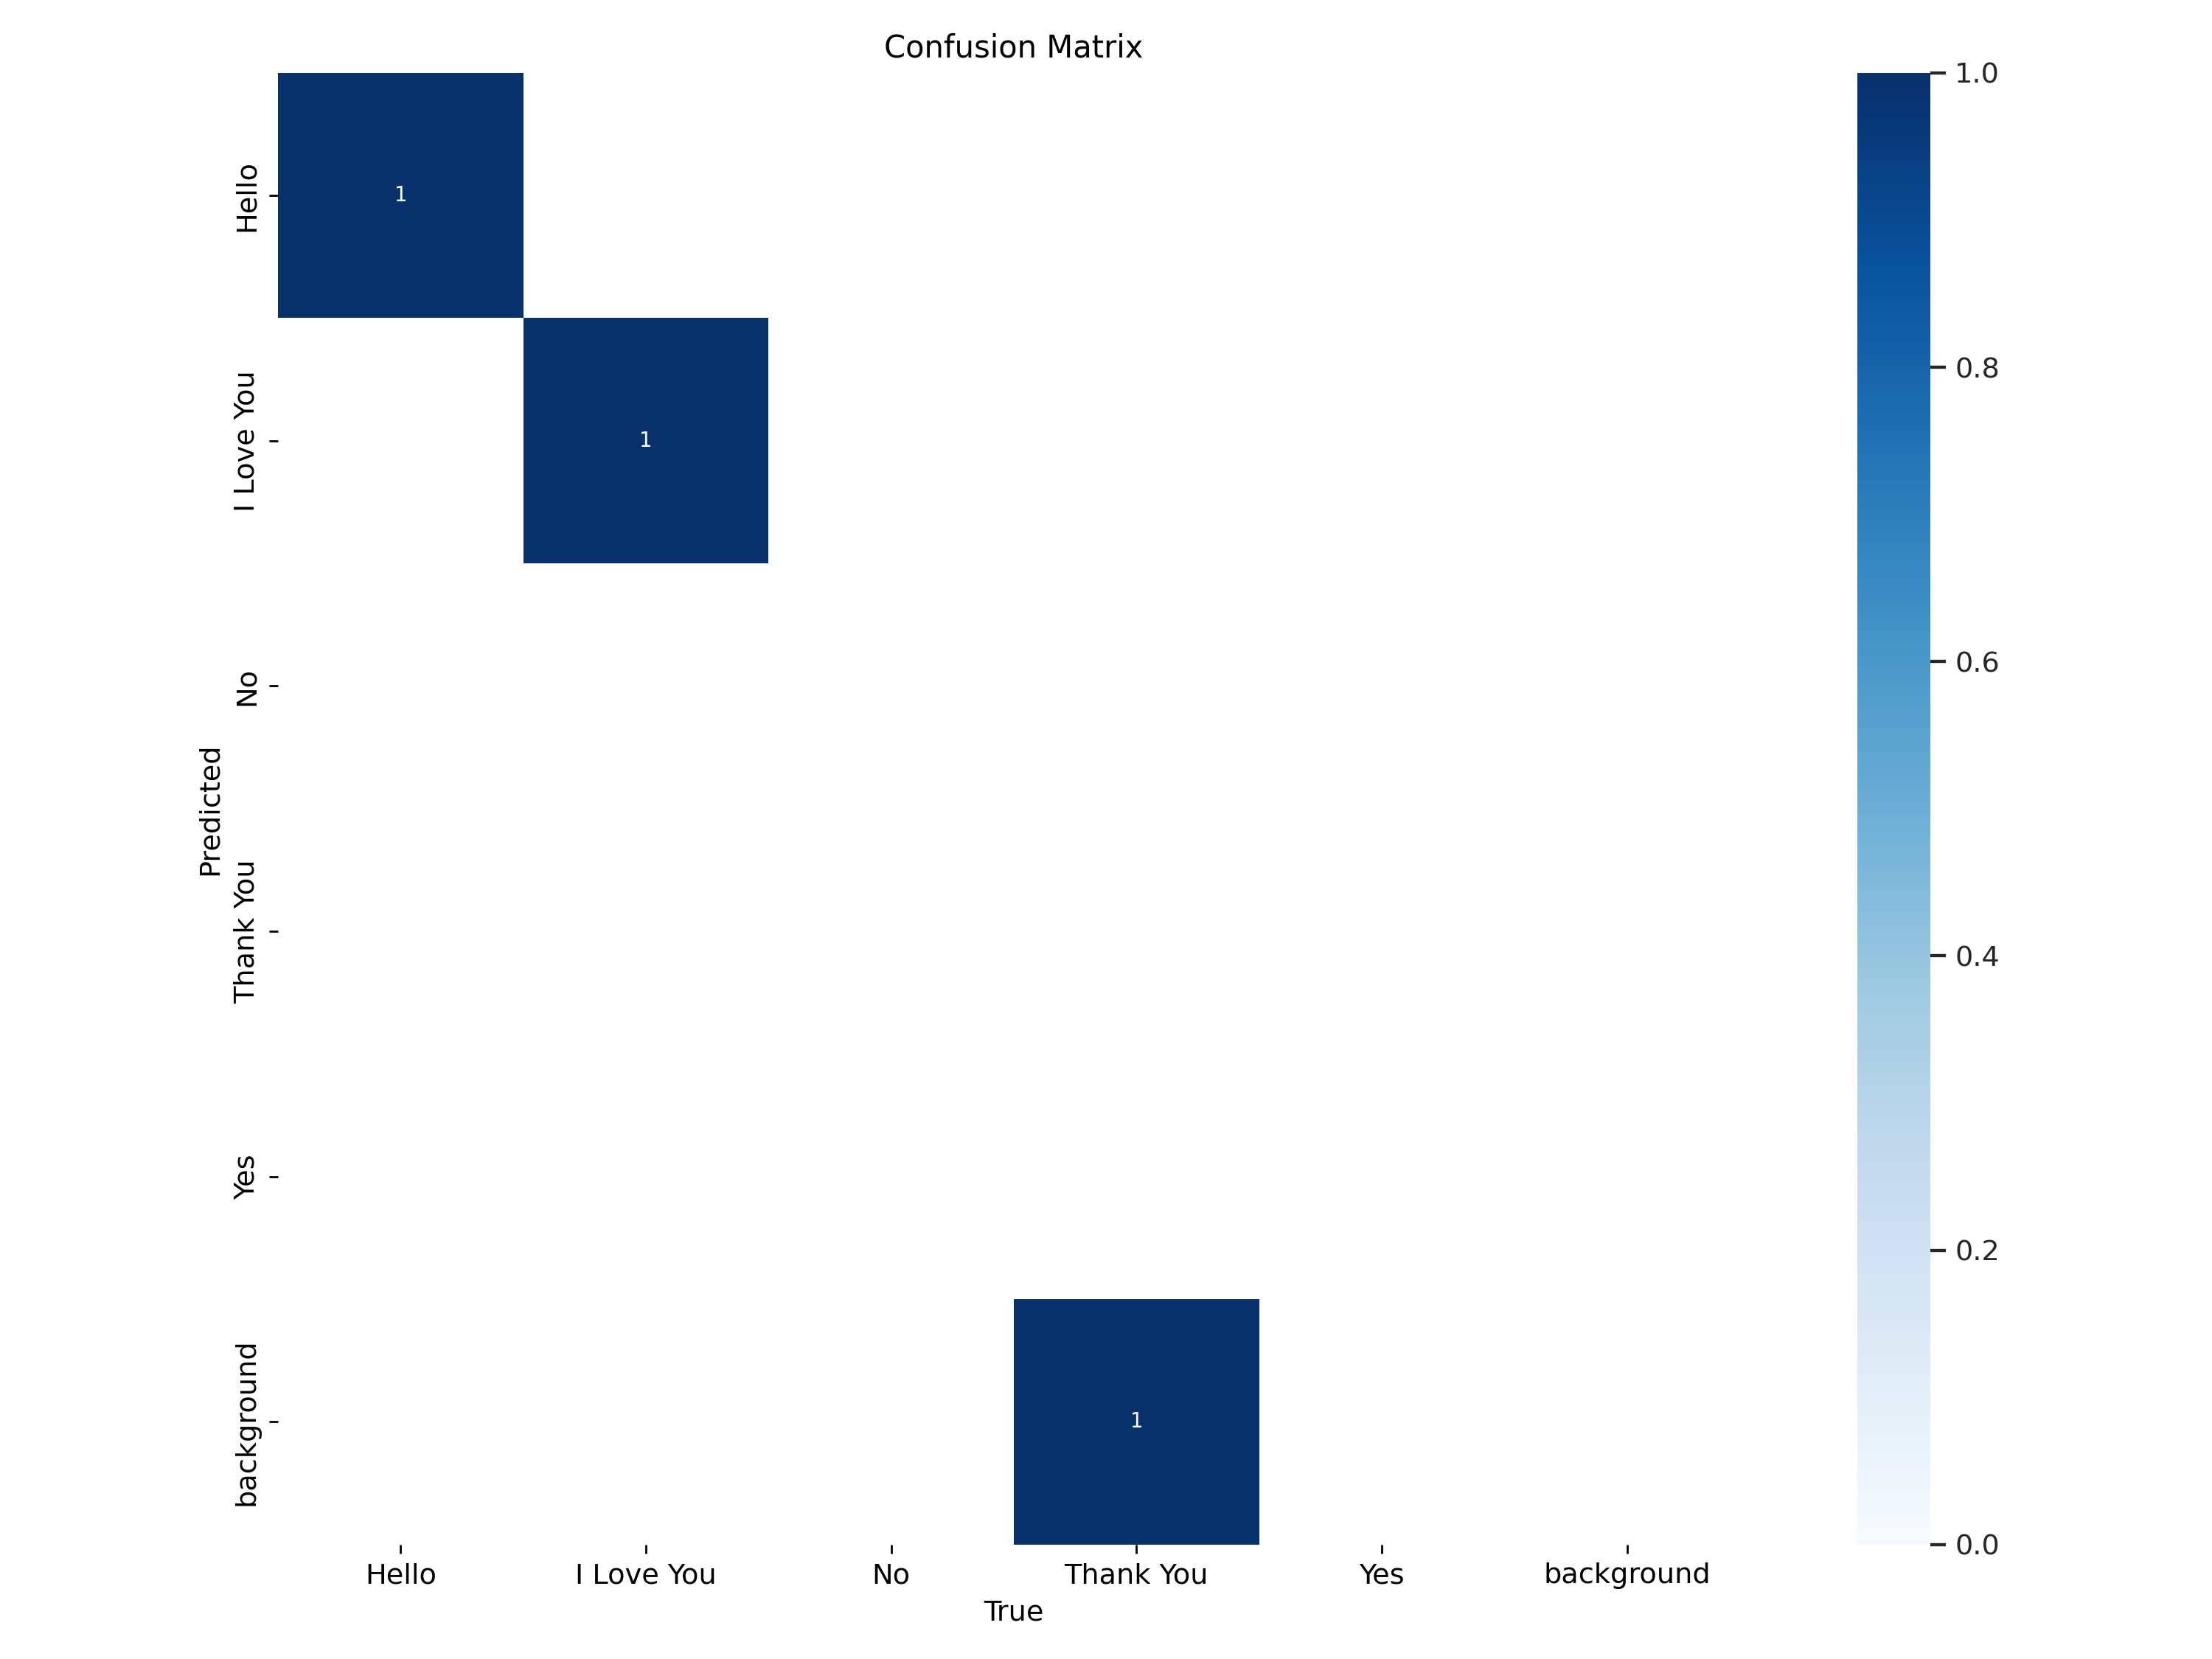

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

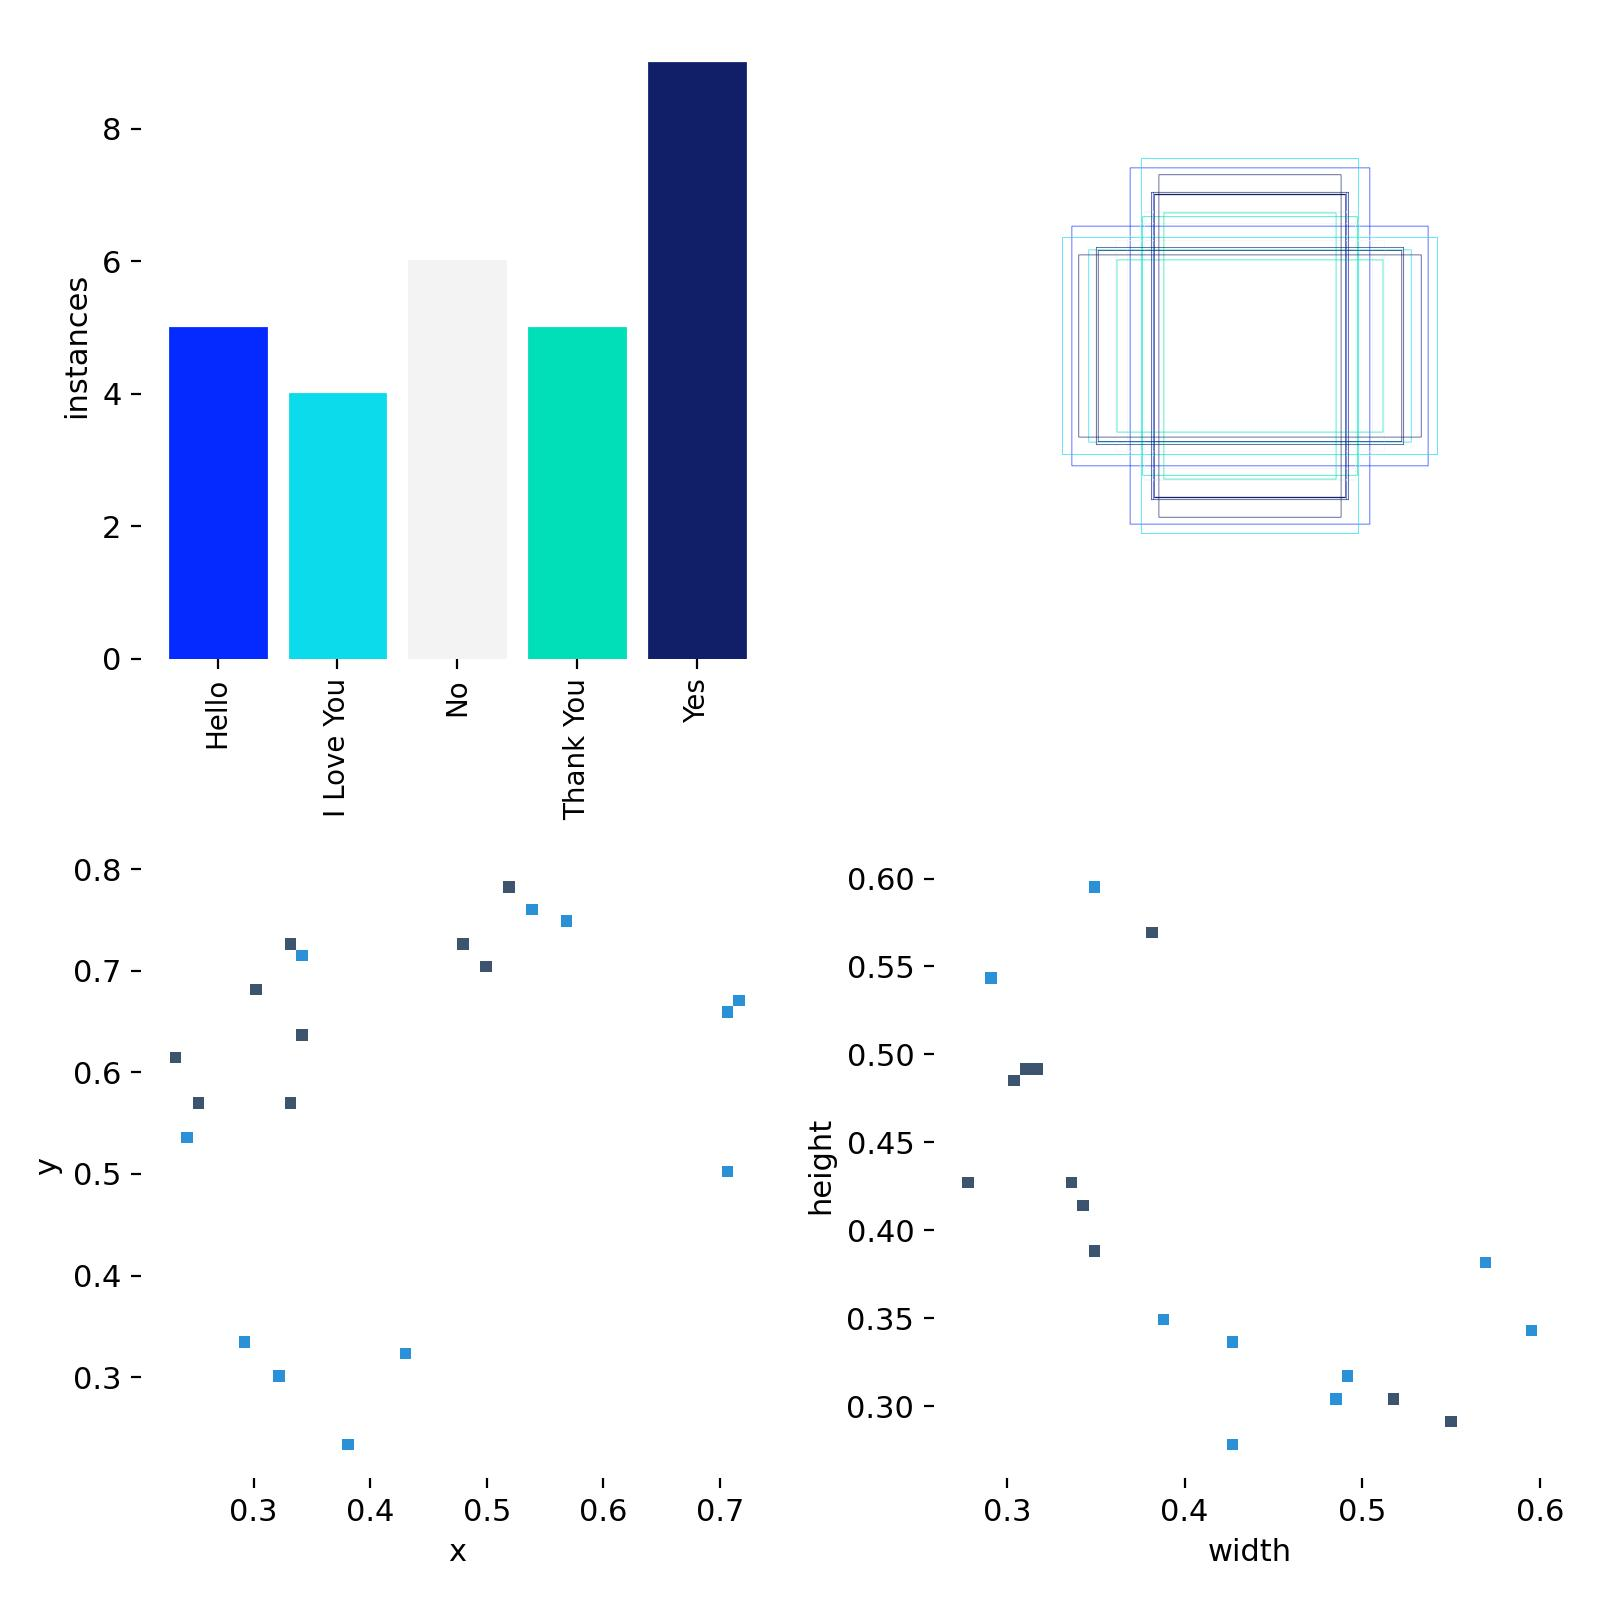

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

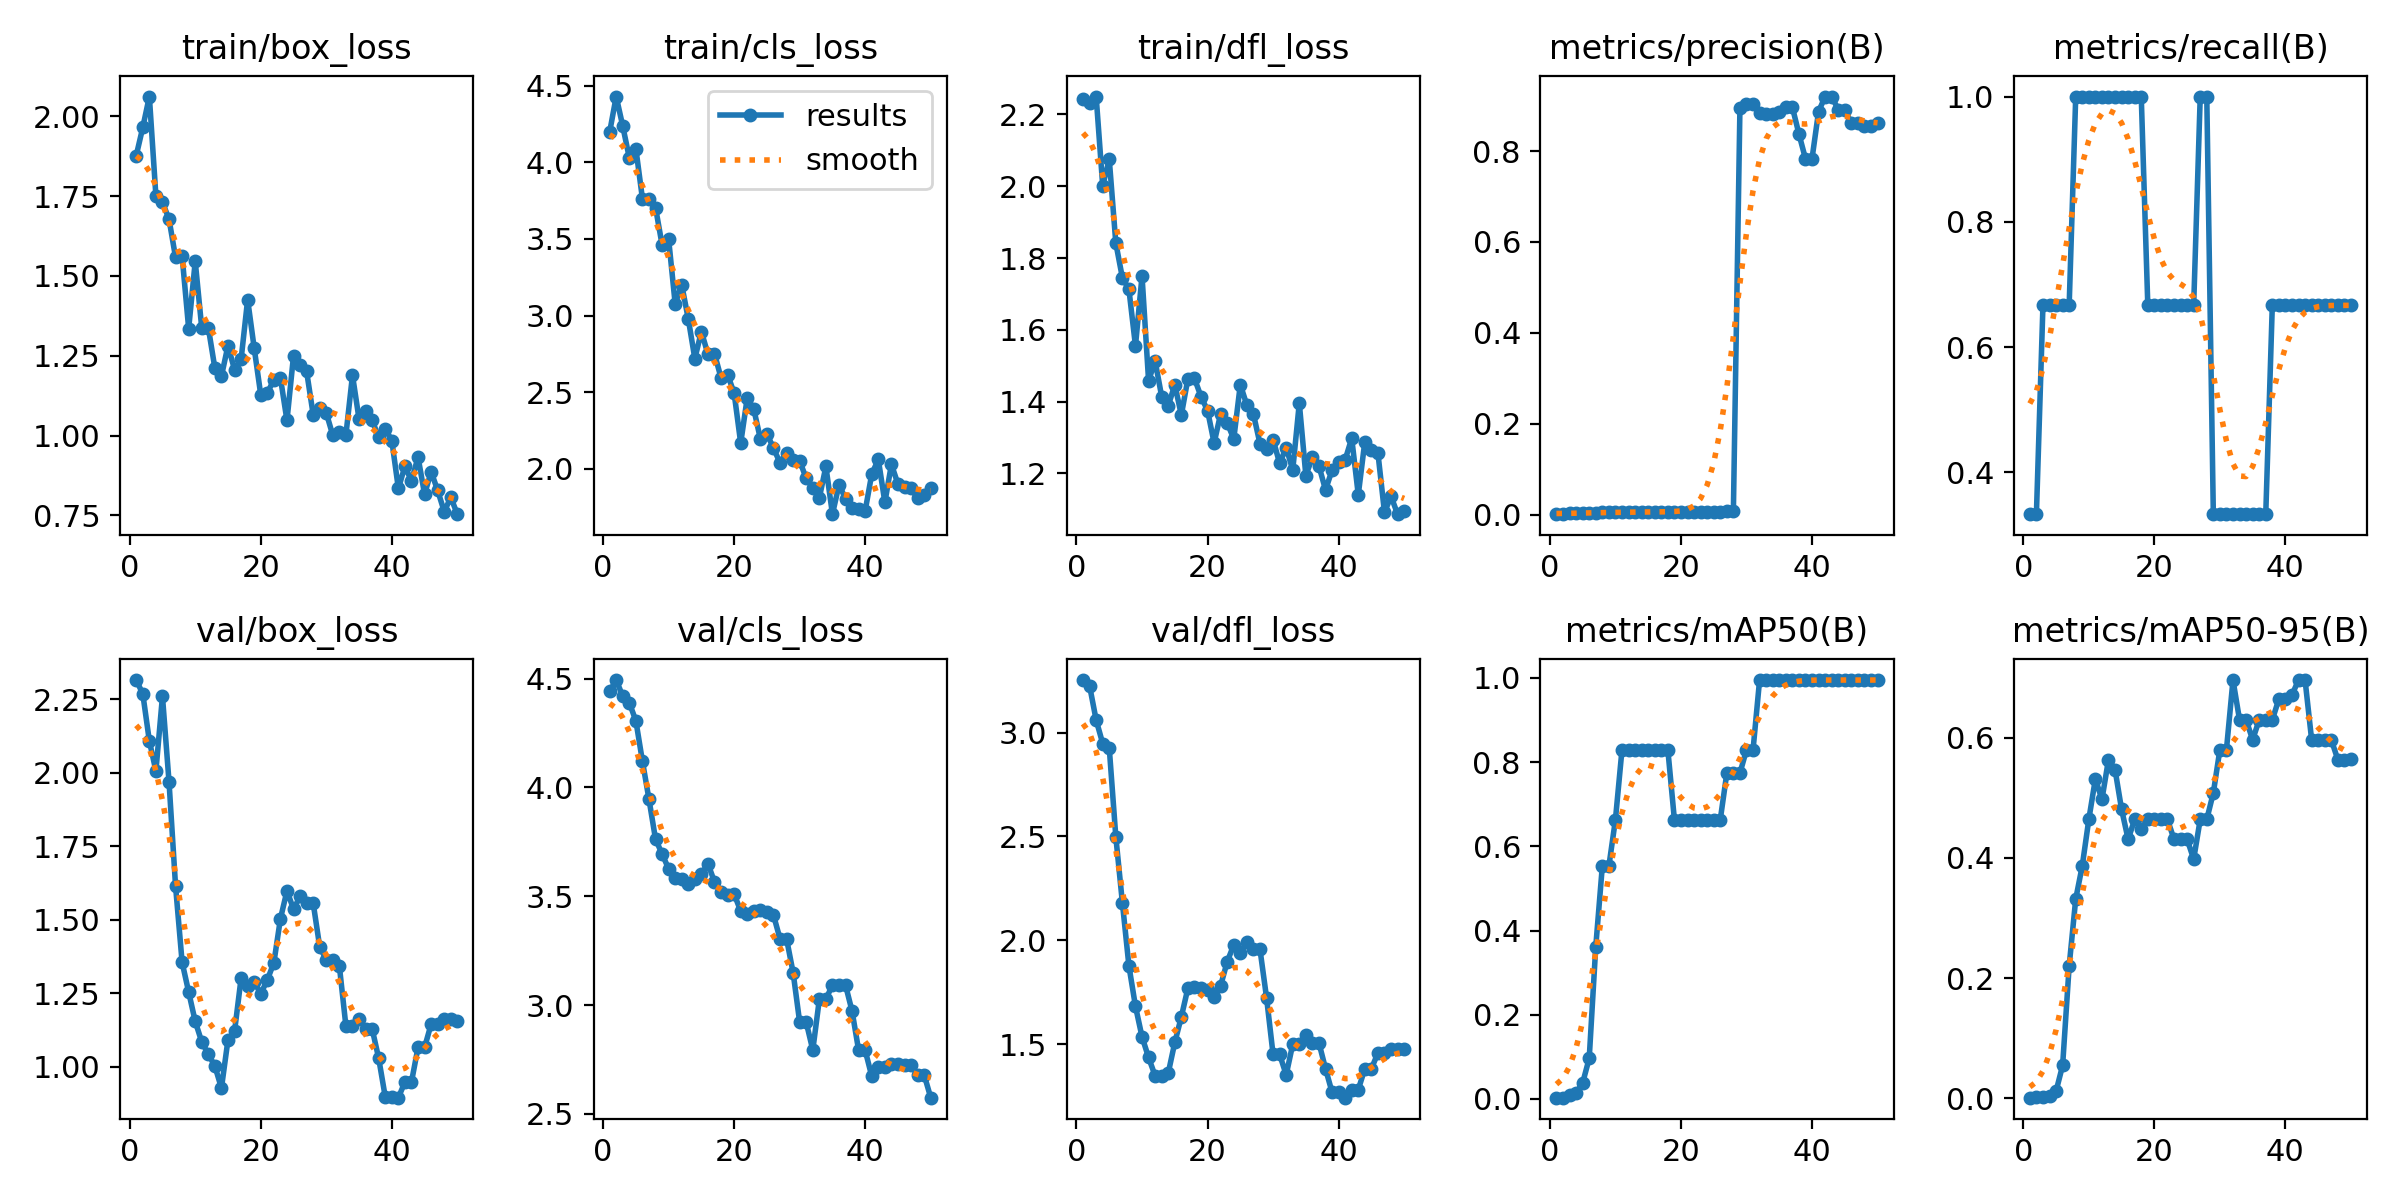

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

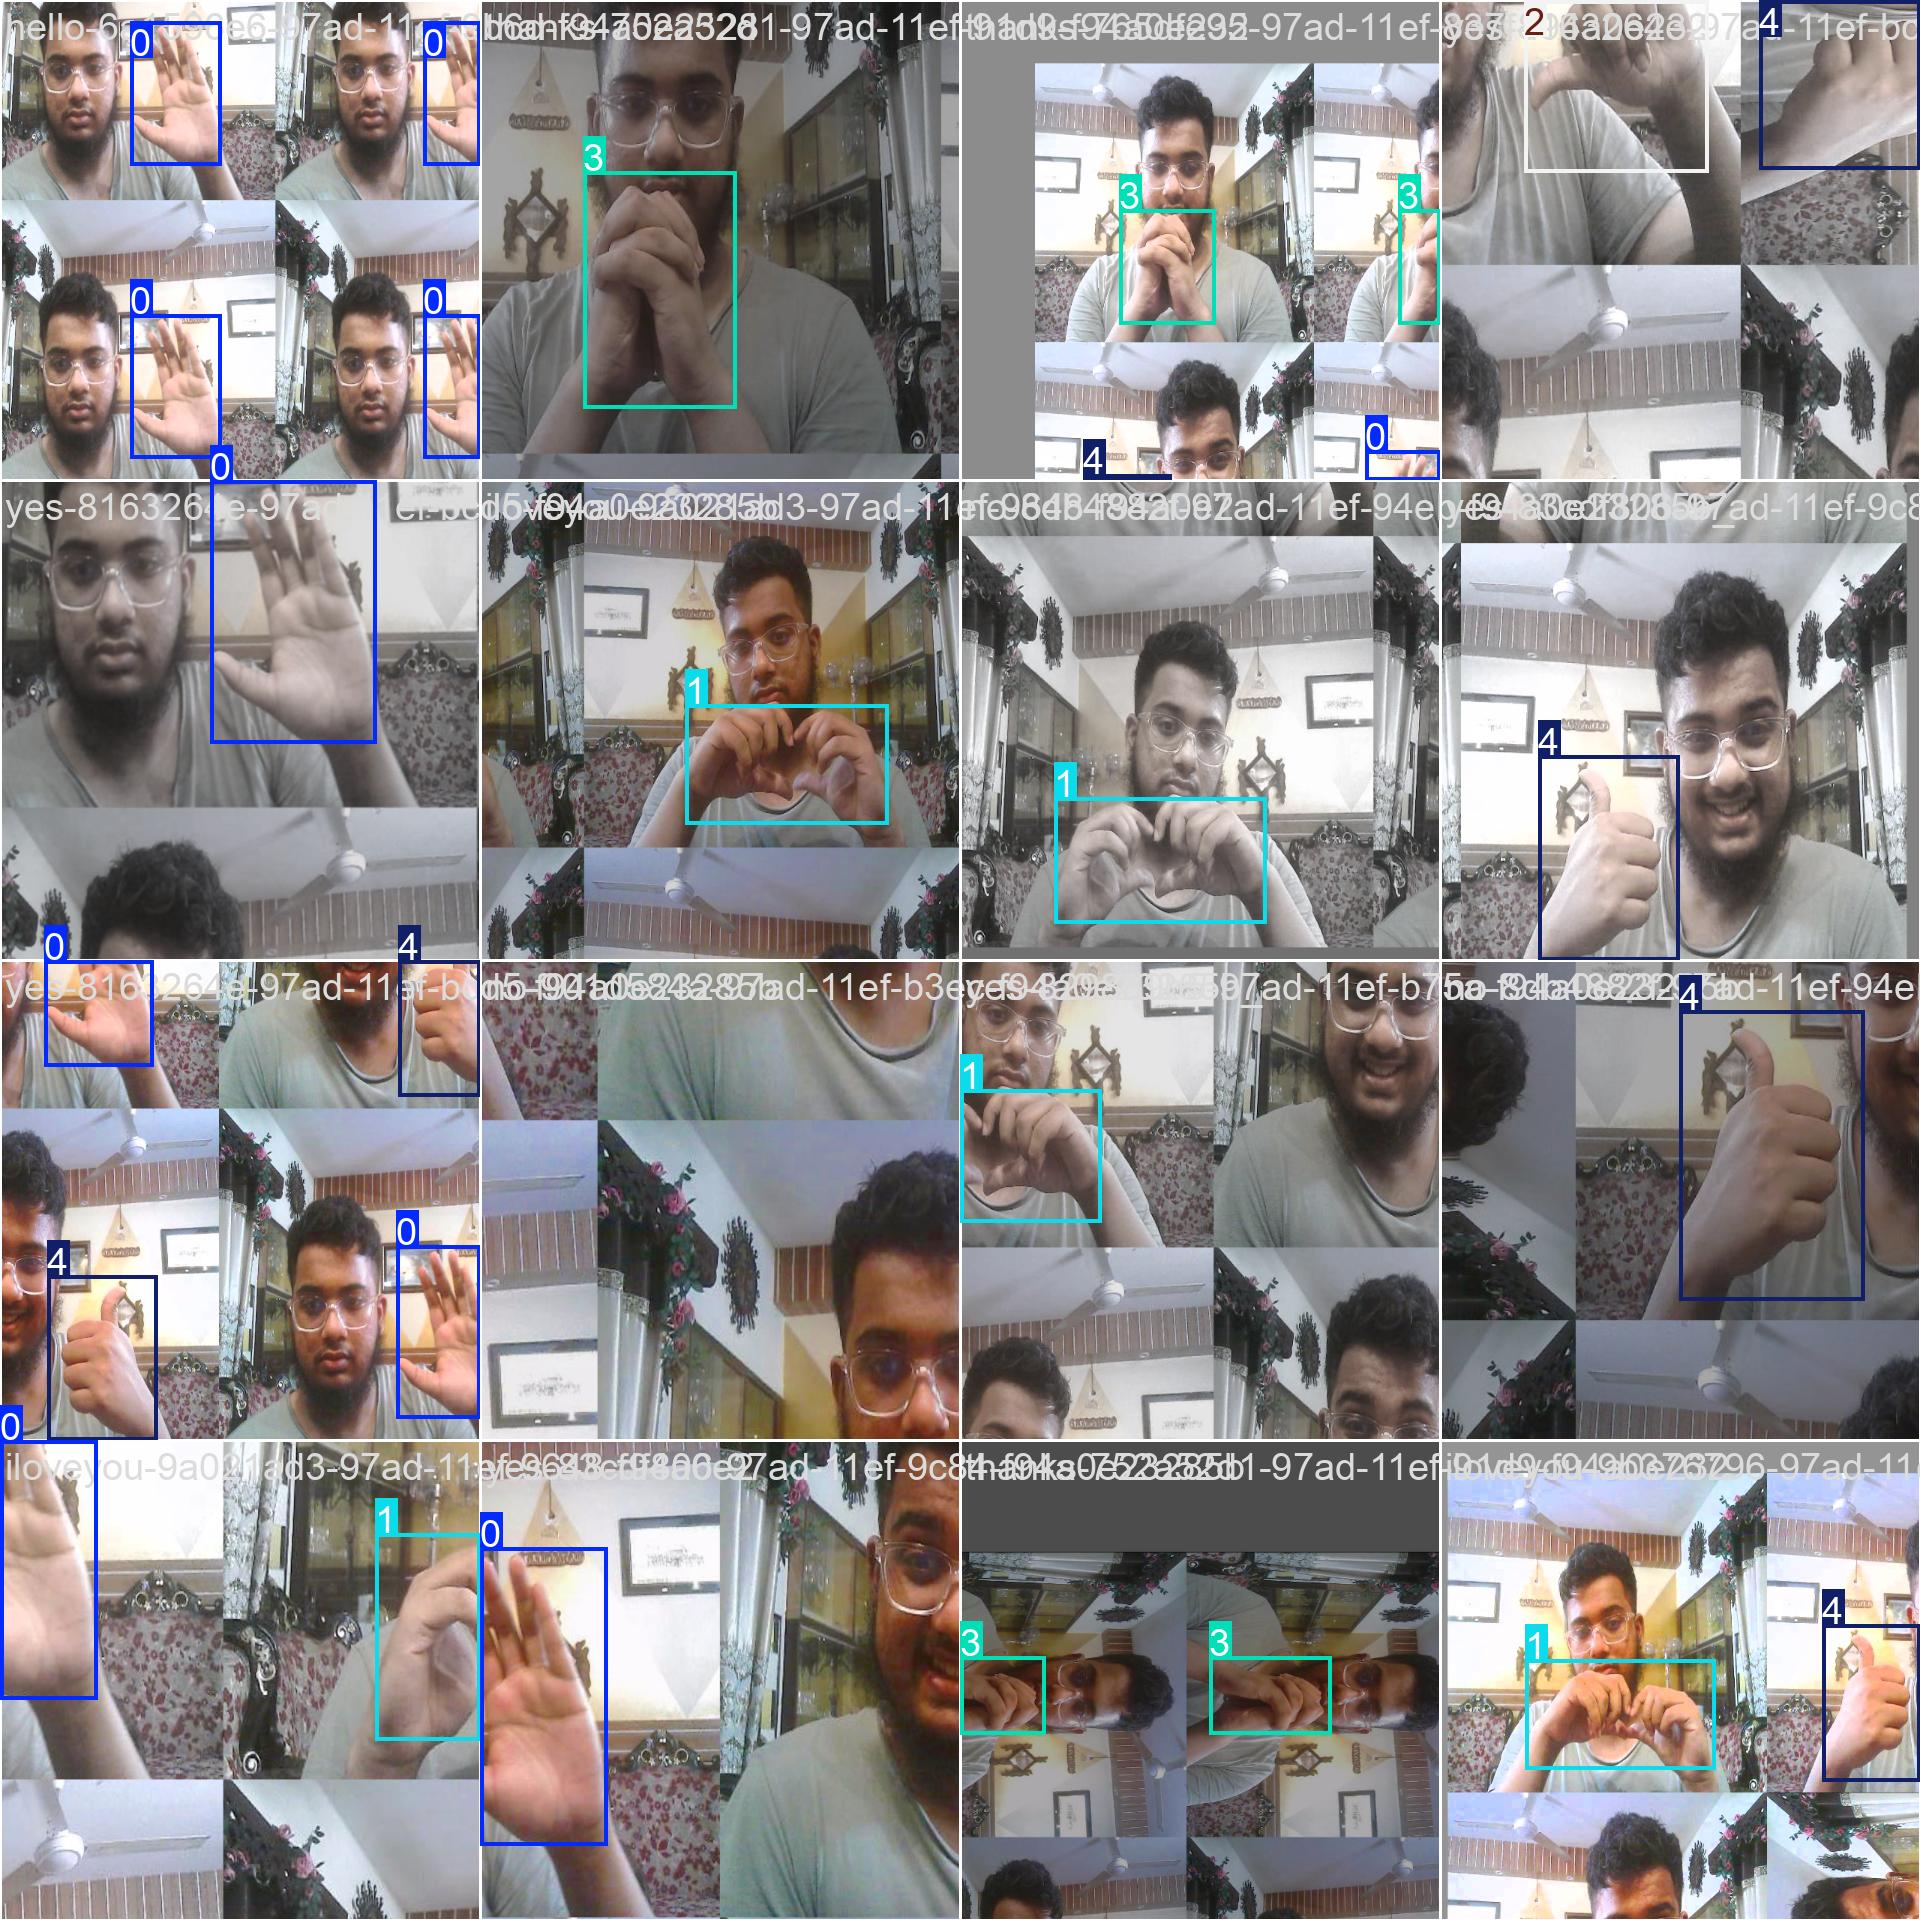

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [ ]:
# Retrain the model with improved parameters
model.train(
    data='/content/data.yaml',
    epochs=100,  # Increase epochs
    imgsz=640,
    batch=16,
    augment=True,  # Enable augmentation
    mixup=0.1,    # Add mixup augmentation
    mosaic=0.5,   # Add mosaic augmentation
    patience=50   # Early stopping patience
)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/train/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.47G      2.258      4.146      2.394         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          3          3    0.00145      0.333     0.0553      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.35G      2.574      4.203      2.697         25        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          3          3    0.00529      0.667      0.116     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G      2.525      4.152      2.646         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          3          3    0.00174      0.333     0.0829     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.35G      2.387       4.08      2.457         26        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all          3          3    0.00517      0.667     0.0324    0.00877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      2.441      4.419      2.504         20        640: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          3          3    0.00515      0.667      0.171     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.36G      2.285      4.244      2.428         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


                   all          3          3    0.00574      0.667     0.0548     0.0102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      2.254      4.059      2.391         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all          3          3    0.00207      0.333     0.0144    0.00433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.36G      2.056       3.69      2.275         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


                   all          3          3    0.00179      0.333     0.0332    0.00409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G      1.985      3.837      2.157         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all          3          3    0.00172      0.333    0.00395    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G      1.886      3.707      2.092         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          3          3    0.00364      0.667    0.00609   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G      1.879      3.755      1.991         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          3          3    0.00374      0.667     0.0322     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G      1.981       3.73      2.101         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          3          3    0.00372      0.667     0.0308    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G      1.814      3.541       2.01         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all          3          3    0.00406      0.667     0.0295    0.00469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G      1.751      3.518      1.927         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all          3          3    0.00412      0.667     0.0193    0.00401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G      2.072      3.558      2.053         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all          3          3    0.00455      0.667     0.0389    0.00952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G      1.698      3.307       1.79         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all          3          3    0.00492      0.667      0.108     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G      1.865      3.214      2.017         26        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          3          3    0.00539      0.667      0.103     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G      1.735      3.268      1.882         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          3          3    0.00529      0.667      0.079     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.38G      1.627      2.959       1.79         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all          3          3    0.00541      0.667     0.0884     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G       1.63      3.366      1.864         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all          3          3    0.00545      0.667      0.152     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G      1.648      3.217      1.849         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all          3          3    0.00587      0.667      0.158     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G      1.835      3.331      1.939         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          3          3     0.0067          1      0.318     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.38G      1.671      3.282      1.815         19        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          3          3    0.00675          1       0.29     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.36G      1.478       3.14      1.685         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all          3          3    0.00666          1      0.387      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G      1.533      3.003      1.743         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.22it/s]

                   all          3          3    0.00664          1      0.509      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      1.591      3.185      1.787         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          3          3    0.00493      0.667      0.442      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G      1.389      3.315      1.632         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          3          3    0.00458      0.667      0.497      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.36G      1.653      3.149      1.807         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all          3          3    0.00458      0.667      0.497      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G      1.357      2.895      1.639         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


                   all          3          3    0.00445      0.667      0.663      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G      1.469      2.962        1.8         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]


                   all          3          3    0.00427      0.667      0.663      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G      1.373      3.115       1.69         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          3          3    0.00427      0.667      0.663      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.36G      1.371      2.868      1.683         19        640: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          3          3      0.004      0.667      0.663      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G       1.42      2.781      1.657         23        640: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]

                   all          3          3    0.00526          1      0.671       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G      1.315      2.799      1.555         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.66it/s]

                   all          3          3    0.00526          1      0.671       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G      1.284       2.66      1.522         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          3          3      0.365      0.836      0.774      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.36G      1.357      2.781      1.612         30        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all          3          3      0.773      0.667      0.774      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.36G      1.287      2.737      1.631         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          3          3      0.773      0.667      0.774      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.37G      1.484      2.715      1.655         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]

                   all          3          3      0.882      0.333      0.774      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.36G      1.234      2.599       1.46         26        640: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

                   all          3          3      0.894      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.36G      1.234      2.799      1.452         21        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          3          3      0.894      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G      1.388      2.643      1.576         23        640: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all          3          3      0.884      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.36G      1.325      2.592      1.527         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          3          3       0.89      0.333      0.774      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.36G      1.391      2.573       1.55         23        640: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.56it/s]

                   all          3          3       0.89      0.333      0.774      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G      1.358      2.808      1.595         20        640: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]


                   all          3          3      0.892      0.333      0.774      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G      1.223      2.462      1.462         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


                   all          3          3      0.892      0.333      0.774      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.36G      1.415       2.73      1.626         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          3          3      0.899      0.333      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G      1.317      2.518      1.455         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.67it/s]

                   all          3          3      0.899      0.333      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G      1.303      2.655      1.611         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          3          3      0.871      0.667      0.829       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      1.196      2.593      1.461         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          3          3      0.871      0.667      0.829       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G      1.251       2.43       1.55         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          3          3      0.818      0.667      0.829      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G      1.229      2.386      1.487         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all          3          3      0.818      0.667      0.829      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G      1.206      2.632      1.468         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          3          3      0.856      0.667      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G      1.148      2.578      1.427         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]


                   all          3          3      0.856      0.667      0.995       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.38G      1.299      2.483      1.421         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          3          3      0.709          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G      1.349      2.508       1.59         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]


                   all          3          3      0.709          1      0.995       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.36G       1.22      2.426      1.516         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all          3          3      0.664          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G      1.264      2.347      1.584         17        640: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all          3          3      0.664          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G      1.188      2.387      1.446         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]

                   all          3          3       0.64          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G      1.131      2.229       1.37         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all          3          3       0.64          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.36G      1.091      2.298      1.422         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          3          3      0.613          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G       1.15      2.069      1.364         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          3          3      0.613          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G      1.201      2.305      1.406         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]

                   all          3          3      0.642          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.36G       1.13      2.146      1.369         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all          3          3      0.642          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G      1.157      2.283      1.461         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]

                   all          3          3      0.604          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.36G      1.222      2.386      1.443         21        640: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all          3          3      0.604          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G      1.225      2.346      1.469         18        640: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          3          3      0.586          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G      1.152      2.036      1.342         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          3          3      0.586          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G       1.12      2.128      1.383         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.36G      1.195      2.146      1.452         27        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G      1.192      2.189      1.431         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          3          3      0.608          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.36G      1.068      2.223      1.435         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all          3          3      0.608          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G      1.154      2.251      1.462         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          3          3      0.596          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G      1.251      2.154      1.487         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          3          3      0.596          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G      1.291      2.251      1.493         16        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G      1.165       2.07      1.394         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.04it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.36G      1.097      2.189      1.353         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          3          3      0.567          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.36G      1.082      2.149      1.298         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all          3          3      0.567          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G       1.11      2.354      1.383         17        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          3          3      0.563          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G      1.069      2.032      1.341         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all          3          3      0.563          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G      1.116      1.905      1.318         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          3          3      0.542          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.9005      1.838      1.264         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          3          3      0.542          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G      1.055      2.007      1.388         19        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          3          3      0.532          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G      1.078      2.167      1.316         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all          3          3      0.532          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G      1.208      2.094      1.373         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          3          3      0.554          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.36G      1.125      2.008      1.444         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          3          3      0.554          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G      1.084      2.217      1.407         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

                   all          3          3      0.557          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.36G      1.123          2      1.306         28        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          3          3      0.557          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.36G      1.159      1.974      1.342         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.17it/s]

                   all          3          3       0.57          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.36G      1.174      2.061      1.358         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          3          3       0.57          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.9954      1.885      1.342         23        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]


                   all          3          3      0.586          1      0.995      0.663
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.36G     0.8359      1.898      1.198         13        640: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all          3          3      0.586          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.9281      1.812      1.196         13        640: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          3          3      0.597          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.8225       1.88      1.193         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all          3          3      0.597          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G     0.8568      1.819      1.216         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]

                   all          3          3      0.594          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G     0.8124       1.84      1.182         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          3          3      0.594          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.8359      1.927      1.256         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all          3          3      0.584          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.7962      1.842      1.281         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          3          3      0.584          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G      0.901      1.967      1.308         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.89it/s]

                   all          3          3      0.582          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G     0.8237      1.848      1.179         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          3          3      0.582          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.8257      1.844        1.2         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all          3          3      0.587          1      0.995       0.63



100 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


                   all          3          3      0.598      0.988      0.829      0.497
                 Hello          1          1      0.701          1      0.995      0.398
            I Love You          1          1      0.612          1      0.995      0.697
             Thank You          1          1      0.482      0.963      0.497      0.398
Speed: 0.5ms preprocess, 61.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e1d61f6e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Run validation to check model performance
metrics = model.val(data='/content/data.yaml')
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


                   all          3          3      0.596      0.979      0.829      0.497
                 Hello          1          1      0.706          1      0.995      0.398
            I Love You          1          1      0.613          1      0.995      0.697
             Thank You          1          1      0.469      0.937      0.497      0.398
Speed: 0.4ms preprocess, 80.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train52
mAP50: 0.8291666666666666
mAP50-95: 0.4975


**Step # 08 Inference with Custom Model on Videos**

In [ ]:
# Training with augmentation
model.train(
    data='/content/data.yaml',
    epochs=100,
    imgsz=640,
    augment=True,
    mixup=0.1,
    mosaic=0.5
)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/train/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.42G      2.258      4.146      2.394         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          3          3    0.00145      0.333     0.0553      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.39G      2.574      4.203      2.697         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          3          3    0.00529      0.667      0.116     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.39G      2.525      4.152      2.646         19        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all          3          3    0.00174      0.333     0.0829     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.4G      2.387       4.08      2.457         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


                   all          3          3    0.00517      0.667     0.0324    0.00877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.43G      2.441      4.419      2.504         20        640: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


                   all          3          3    0.00515      0.667      0.171     0.0193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.43G      2.285      4.244      2.428         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all          3          3    0.00574      0.667     0.0548     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.43G      2.254      4.059      2.391         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]

                   all          3          3    0.00207      0.333     0.0144    0.00433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.43G      2.056       3.69      2.275         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all          3          3    0.00179      0.333     0.0332    0.00409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.43G      1.985      3.837      2.157         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]

                   all          3          3    0.00172      0.333    0.00395    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.43G      1.886      3.707      2.092         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          3          3    0.00364      0.667    0.00609   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.43G      1.879      3.755      1.991         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all          3          3    0.00374      0.667     0.0322     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.43G      1.981       3.73      2.101         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          3          3    0.00372      0.667     0.0308    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G      1.814      3.541       2.01         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all          3          3    0.00406      0.667     0.0295    0.00469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.42G      1.751      3.518      1.927         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          3          3    0.00412      0.667     0.0193    0.00401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.42G      2.072      3.558      2.053         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


                   all          3          3    0.00455      0.667     0.0389    0.00952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.45G      1.698      3.307       1.79         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all          3          3    0.00492      0.667      0.108     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.43G      1.865      3.214      2.017         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all          3          3    0.00539      0.667      0.103     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.43G      1.735      3.268      1.882         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all          3          3    0.00529      0.667      0.079     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G      1.627      2.959       1.79         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all          3          3    0.00541      0.667     0.0884     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.43G       1.63      3.366      1.864         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          3          3    0.00545      0.667      0.152     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.43G      1.648      3.217      1.849         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

                   all          3          3    0.00587      0.667      0.158     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.43G      1.835      3.331      1.939         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          3          3     0.0067          1      0.318     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.44G      1.671      3.282      1.815         19        640: 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          3          3    0.00675          1       0.29     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.43G      1.478       3.14      1.685         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all          3          3    0.00666          1      0.387      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.42G      1.533      3.003      1.743         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all          3          3    0.00664          1      0.509      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.43G      1.591      3.185      1.787         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all          3          3    0.00493      0.667      0.442      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.43G      1.389      3.315      1.632         14        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          3          3    0.00458      0.667      0.497      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.43G      1.653      3.149      1.807         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          3          3    0.00458      0.667      0.497      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.42G      1.357      2.895      1.639         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          3          3    0.00445      0.667      0.663      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.43G      1.469      2.962        1.8         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all          3          3    0.00427      0.667      0.663      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.43G      1.373      3.115       1.69         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          3          3    0.00427      0.667      0.663      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.42G      1.371      2.868      1.683         19        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          3          3      0.004      0.667      0.663      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.43G       1.42      2.781      1.657         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all          3          3    0.00526          1      0.671       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.43G      1.315      2.799      1.555         21        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all          3          3    0.00526          1      0.671       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.42G      1.284       2.66      1.522         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          3          3      0.365      0.836      0.774      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.43G      1.357      2.781      1.612         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all          3          3      0.773      0.667      0.774      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.43G      1.287      2.737      1.631         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          3          3      0.773      0.667      0.774      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.43G      1.484      2.715      1.655         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]

                   all          3          3      0.882      0.333      0.774      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.43G      1.234      2.599       1.46         26        640: 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.07it/s]

                   all          3          3      0.894      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.43G      1.234      2.799      1.452         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all          3          3      0.894      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.42G      1.388      2.643      1.576         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

                   all          3          3      0.884      0.333      0.774      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.43G      1.325      2.592      1.527         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          3          3       0.89      0.333      0.774      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.43G      1.391      2.573       1.55         23        640: 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all          3          3       0.89      0.333      0.774      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.42G      1.358      2.808      1.595         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all          3          3      0.892      0.333      0.774      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.43G      1.223      2.462      1.462         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          3          3      0.892      0.333      0.774      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.42G      1.415       2.73      1.626         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all          3          3      0.899      0.333      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.43G      1.317      2.518      1.455         27        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          3          3      0.899      0.333      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.42G      1.303      2.655      1.611         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all          3          3      0.871      0.667      0.829       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.43G      1.196      2.593      1.461         21        640: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all          3          3      0.871      0.667      0.829       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.42G      1.251       2.43       1.55         17        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all          3          3      0.818      0.667      0.829      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.43G      1.229      2.386      1.487         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          3          3      0.818      0.667      0.829      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.42G      1.206      2.632      1.468         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          3          3      0.856      0.667      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.43G      1.148      2.578      1.427         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          3          3      0.856      0.667      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.44G      1.299      2.483      1.421         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          3          3      0.709          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.43G      1.349      2.508       1.59         26        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          3          3      0.709          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.42G       1.22      2.426      1.516         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          3          3      0.664          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.43G      1.264      2.347      1.584         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          3          3      0.664          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.42G      1.188      2.387      1.446         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          3          3       0.64          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.43G      1.131      2.229       1.37         20        640: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all          3          3       0.64          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.42G      1.091      2.298      1.422         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all          3          3      0.613          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.43G       1.15      2.069      1.364         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          3          3      0.613          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.42G      1.201      2.305      1.406         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          3          3      0.642          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.43G       1.13      2.146      1.369         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all          3          3      0.642          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.42G      1.157      2.283      1.461         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          3          3      0.604          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.43G      1.222      2.386      1.443         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all          3          3      0.604          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.42G      1.225      2.346      1.469         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all          3          3      0.586          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.43G      1.152      2.036      1.342         29        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all          3          3      0.586          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.44G       1.12      2.128      1.383         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.43G      1.195      2.146      1.452         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.42G      1.192      2.189      1.431         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          3          3      0.608          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.43G      1.068      2.223      1.435         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          3          3      0.608          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.43G      1.154      2.251      1.462         24        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


                   all          3          3      0.596          1      0.995      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.43G      1.251      2.154      1.487         27        640: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all          3          3      0.596          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.42G      1.291      2.251      1.493         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.43G      1.165       2.07      1.394         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          3          3      0.597          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.42G      1.097      2.189      1.353         20        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          3          3      0.567          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.43G      1.082      2.149      1.298         24        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all          3          3      0.567          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.42G       1.11      2.354      1.383         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all          3          3      0.563          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.43G      1.069      2.032      1.341         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all          3          3      0.563          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.42G      1.116      1.905      1.318         23        640: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          3          3      0.542          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.43G     0.9005      1.838      1.264         16        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          3          3      0.542          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.42G      1.055      2.007      1.388         19        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.45it/s]

                   all          3          3      0.532          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.43G      1.078      2.167      1.316         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          3          3      0.532          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.42G      1.208      2.094      1.373         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.09it/s]

                   all          3          3      0.554          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.43G      1.125      2.008      1.444         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all          3          3      0.554          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.42G      1.084      2.217      1.407         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all          3          3      0.557          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.43G      1.123          2      1.306         28        640: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          3          3      0.557          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.42G      1.159      1.974      1.342         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          3          3       0.57          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.43G      1.174      2.061      1.358         20        640: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all          3          3       0.57          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.42G     0.9954      1.885      1.342         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all          3          3      0.586          1      0.995      0.663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.43G     0.8359      1.898      1.198         13        640: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all          3          3      0.586          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G     0.9281      1.812      1.196         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all          3          3      0.597          1      0.995      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.43G     0.8225       1.88      1.193         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.60it/s]

                   all          3          3      0.597          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.42G     0.8568      1.819      1.216         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]

                   all          3          3      0.594          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.43G     0.8124       1.84      1.182         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all          3          3      0.594          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.42G     0.8359      1.927      1.256         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]

                   all          3          3      0.584          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.43G     0.7962      1.842      1.281         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.43it/s]

                   all          3          3      0.584          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.42G      0.901      1.967      1.308         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          3          3      0.582          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.43G     0.8237      1.848      1.179         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          3          3      0.582          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.8257      1.844        1.2         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


                   all          3          3      0.587          1      0.995       0.63

100 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]


                   all          3          3      0.598      0.988      0.829      0.497
                 Hello          1          1      0.701          1      0.995      0.398
            I Love You          1          1      0.612          1      0.995      0.697
             Thank You          1          1      0.482      0.963      0.497      0.398
Speed: 0.3ms preprocess, 23.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e1d83744f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

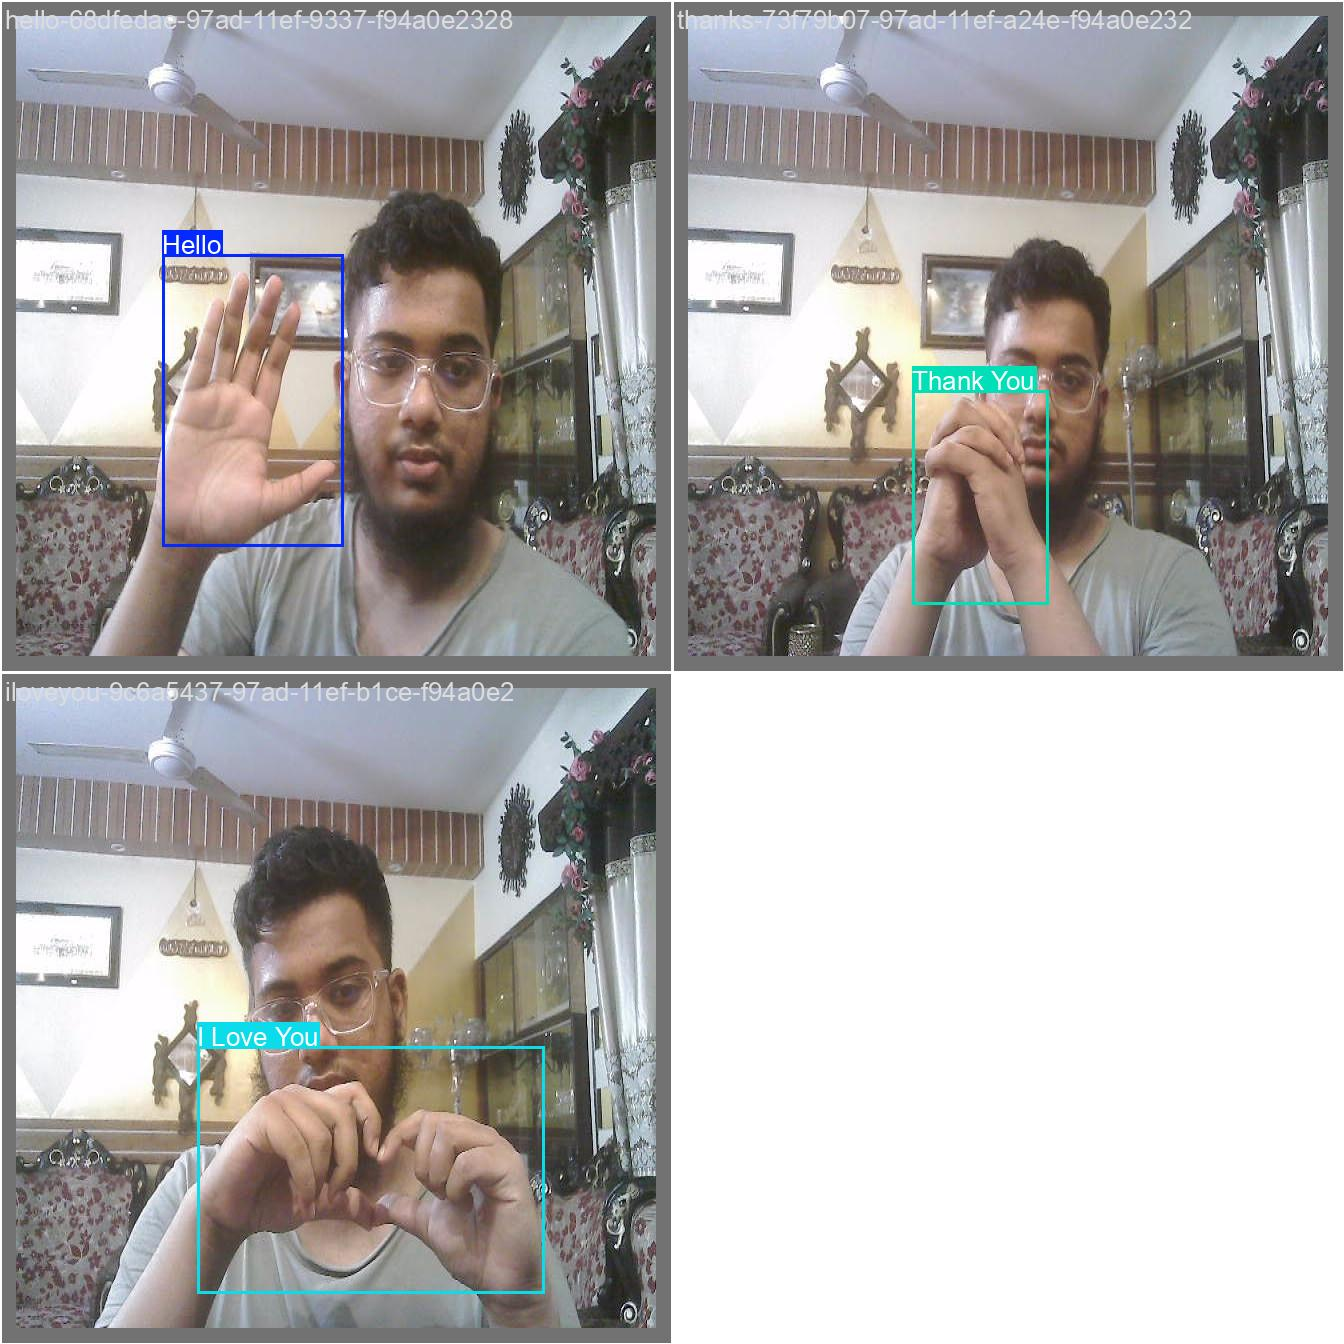

In [ ]:
Image("/content/runs/detect/val2/val_batch0_labels.jpg", width=600)

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train6/weights/best.pt" conf=0.25 source="/content/test/images" save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/2 /content/test/images/no-8ee9d4f0-97ad-11ef-905e-f94a0e23285b_jpg.rf.d641e4c7170e0a37dfb9cbd4e81b23b3.jpg: 640x640 1 No, 10.2ms
image 2/2 /content/test/images/thanks-7791a985-97ad-11ef-97bd-f94a0e23285b_jpg.rf.94ae2f279d15e7b1ba0e13b499382bf2.jpg: 640x640 (no detections), 8.8ms
Speed: 2.8ms preprocess, 9.5ms inference, 270.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


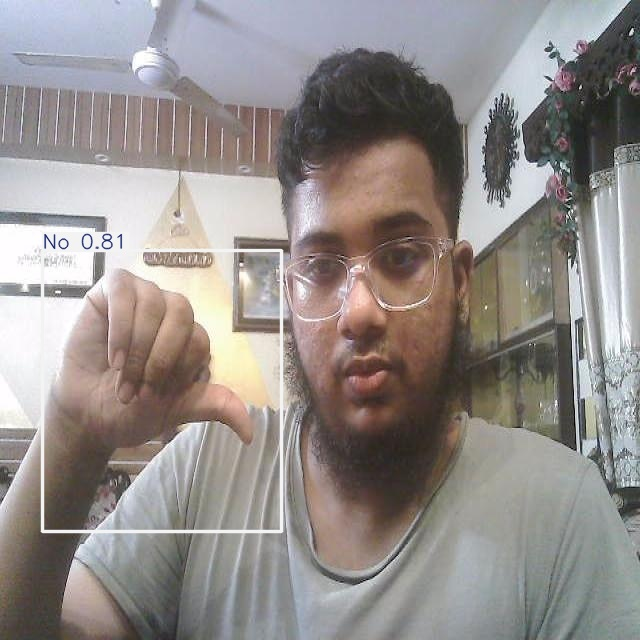

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train6/weights/best.pt" conf=0.25 source="/content/train/images/iloveyou-9b376796-97ad-11ef-b6b3-f94a0e23285b_jpg.rf.33c59ba725b1d987a033e61487a68523.jpg" save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/train/images/iloveyou-9b376796-97ad-11ef-b6b3-f94a0e23285b_jpg.rf.33c59ba725b1d987a033e61487a68523.jpg: 640x640 1 I Love You, 18.2ms
Speed: 3.0ms preprocess, 18.2ms inference, 832.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


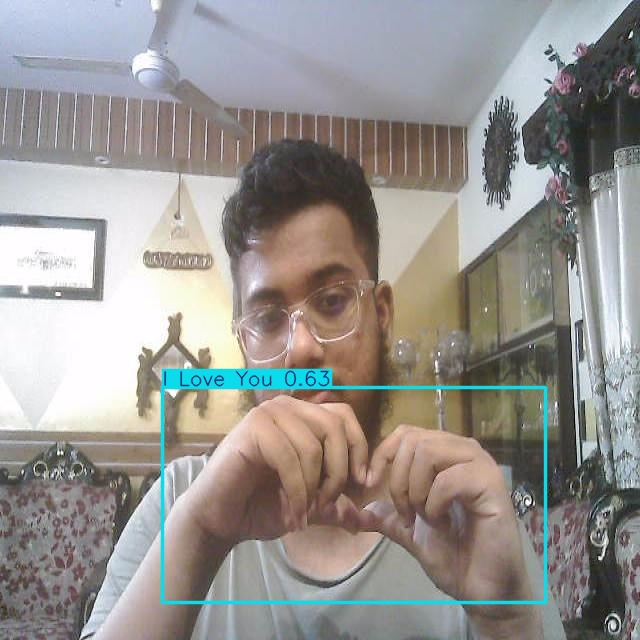

In [ ]:
Image("/content/runs/detect/predict5/iloveyou-9b376796-97ad-11ef-b6b3-f94a0e23285b_jpg.rf.33c59ba725b1d987a033e61487a68523.jpg", width=600)

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train6/weights/best.pt" conf=0.25 source="/content/3421753165-preview.avi" save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/151) /content/3421753165-preview.avi: 384x640 (no detections), 73.1ms
video 1/1 (frame 2/151) /content/3421753165-preview.avi: 384x640 (no detections), 13.7ms
video 1/1 (frame 3/151) /content/3421753165-preview.avi: 384x640 (no detections), 17.4ms
video 1/1 (frame 4/151) /content/3421753165-preview.avi: 384x640 (no detections), 13.8ms
video 1/1 (frame 5/151) /content/3421753165-preview.avi: 384x640 (no detections), 12.3ms
video 1/1 (frame 6/151) /content/3421753165-preview.avi: 384x640 (no detections), 12.6ms
video 1/1 (frame 7/151) /content/3421753165-preview.avi: 384x640 (no detections), 12.0ms
video 1/1 (frame 8/151) /content/3421753165-preview.avi: 384x640 (no detections), 11.8ms
video 1/1 (frame 9/151) /content/3421753165-preview.avi: 384x640 (no detections), 11.8ms
video 1/1 (frame 10/151) /content

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict6/3421753165-preview.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)
